### Setup



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%%shell
git clone https://github.com/adeshkin/classification_dogs.git --quiet
pip install -r classification_dogs/scripts/requirements.txt --quiet

In [ ]:
%%shell
cd classification_dogs/data
bash download_data.sh
python prepare_data.py

### Augmentations

Compose([
  Resize(always_apply=False, p=1, height=160, width=160, interpolation=1),
  ShiftScaleRotate(always_apply=False, p=0.5, shift_limit=(-0.05, 0.05), scale_limit=(-0.050000000000000044, 0.050000000000000044), rotate_limit=(-45, 45), interpolation=1, border_mode=4, value=None, mask_value=None),
  HorizontalFlip(always_apply=False, p=0.5),
  VerticalFlip(always_apply=False, p=0.5),
  CoarseDropout(always_apply=False, p=0.5, max_holes=2, max_height=60, max_width=60, min_holes=2, min_height=10, min_width=10),
  GaussNoise(always_apply=False, p=0.5, var_limit=(10, 50)),
  RGBShift(always_apply=False, p=0.5, r_shift_limit=(-15, 15), g_shift_limit=(-15, 15), b_shift_limit=(-15, 15)),
  RandomBrightnessContrast(always_apply=False, p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
  Normalize(always_apply=False, p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0),
  ToTensorV2(always_apply=True, p=1.0),
], p=1.0, b

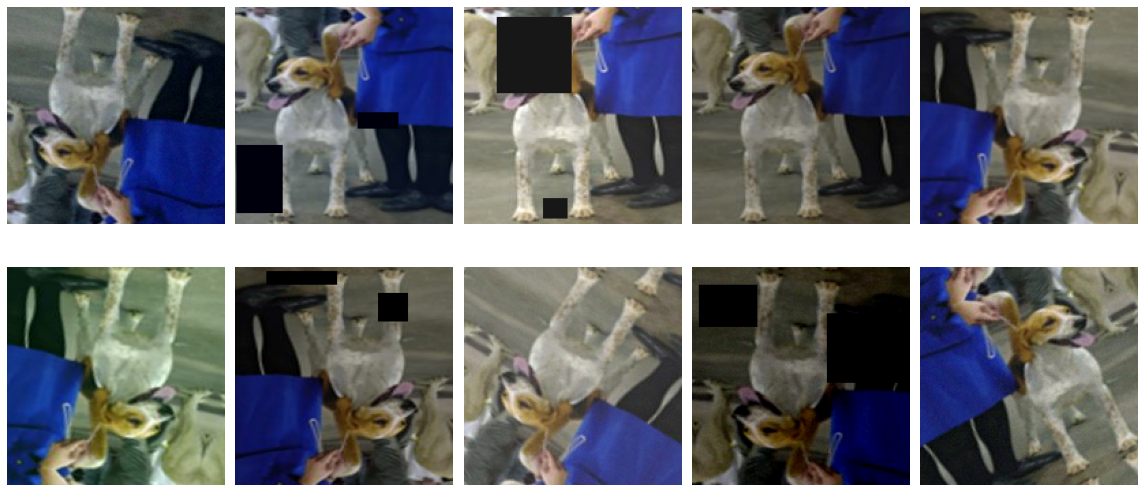

In [ ]:
from classification_dogs.scripts.dataset import get_ds
from classification_dogs.scripts.utils import show_aug_img

data_dir = '/content/drive/MyDrive/classification_dogs/data/imagewoof2-160'

dataset = get_ds(data_dir)['train']
print(dataset.transform)
show_aug_img(dataset)

### Training

Epoch: 1. Train loss: 0.038 | accuracy: 0.587: 100%|██████████| 226/226 [01:56<00:00,  1.93it/s]
Epoch: 1. Validation loss: 0.014 | accuracy: 0.858: 100%|██████████| 57/57 [00:16<00:00,  3.36it/s]



Saved best model
Validation accuracy = 0.858



Epoch: 2. Train loss: 0.023 | accuracy: 0.751: 100%|██████████| 226/226 [01:56<00:00,  1.94it/s]
Epoch: 2. Validation loss: 0.013 | accuracy: 0.867: 100%|██████████| 57/57 [00:15<00:00,  3.62it/s]



Saved best model
Validation accuracy = 0.867



Epoch: 3. Train loss: 0.021 | accuracy: 0.771: 100%|██████████| 226/226 [01:55<00:00,  1.95it/s]
Epoch: 3. Validation loss: 0.012 | accuracy: 0.869: 100%|██████████| 57/57 [00:15<00:00,  3.60it/s]



Saved best model
Validation accuracy = 0.869



Epoch: 4. Train loss: 0.019 | accuracy: 0.786: 100%|██████████| 226/226 [01:58<00:00,  1.91it/s]
Epoch: 4. Validation loss: 0.013 | accuracy: 0.868: 100%|██████████| 57/57 [00:16<00:00,  3.51it/s]
Epoch: 5. Train loss: 0.018 | accuracy: 0.804: 100%|██████████| 226/226 [01:56<00:00,  1.94it/s]
Epoch: 5. Validation loss: 0.012 | accuracy: 0.882: 100%|██████████| 57/57 [00:15<00:00,  3.61it/s]



Saved best model
Validation accuracy = 0.882



Epoch: 6. Train loss: 0.017 | accuracy: 0.820: 100%|██████████| 226/226 [01:59<00:00,  1.90it/s]
Epoch: 6. Validation loss: 0.012 | accuracy: 0.878: 100%|██████████| 57/57 [00:16<00:00,  3.50it/s]
Epoch: 7. Train loss: 0.016 | accuracy: 0.827: 100%|██████████| 226/226 [01:59<00:00,  1.89it/s]
Epoch: 7. Validation loss: 0.013 | accuracy: 0.867: 100%|██████████| 57/57 [00:15<00:00,  3.61it/s]
Epoch: 8. Train loss: 0.015 | accuracy: 0.837: 100%|██████████| 226/226 [01:56<00:00,  1.94it/s]
Epoch: 8. Validation loss: 0.012 | accuracy: 0.876: 100%|██████████| 57/57 [00:15<00:00,  3.64it/s]
Epoch: 9. Train loss: 0.014 | accuracy: 0.853: 100%|██████████| 226/226 [01:56<00:00,  1.94it/s]
Epoch: 9. Validation loss: 0.012 | accuracy: 0.877: 100%|██████████| 57/57 [00:15<00:00,  3.69it/s]
  0%|          | 0/123 [00:00<?, ?it/s]

Test accuracy: 0.870: 100%|██████████| 123/123 [00:33<00:00,  3.62it/s]


                      precision    recall  f1-score   support

            Shih-Tzu       0.87      0.89      0.88       409
 Rhodesian_ridgeback       0.90      0.88      0.89       408
              beagle       0.82      0.86      0.84       418
    English_foxhound       0.80      0.63      0.71       224
      Border_terrier       0.81      0.90      0.85       401
  Australian_terrier       0.87      0.87      0.87       407
    golden_retriever       0.87      0.88      0.87       401
Old_English_sheepdog       0.92      0.88      0.90       422
             Samoyed       0.95      0.93      0.94       429
               dingo       0.88      0.87      0.87       410

            accuracy                           0.87      3929
           macro avg       0.87      0.86      0.86      3929
        weighted avg       0.87      0.87      0.87      3929



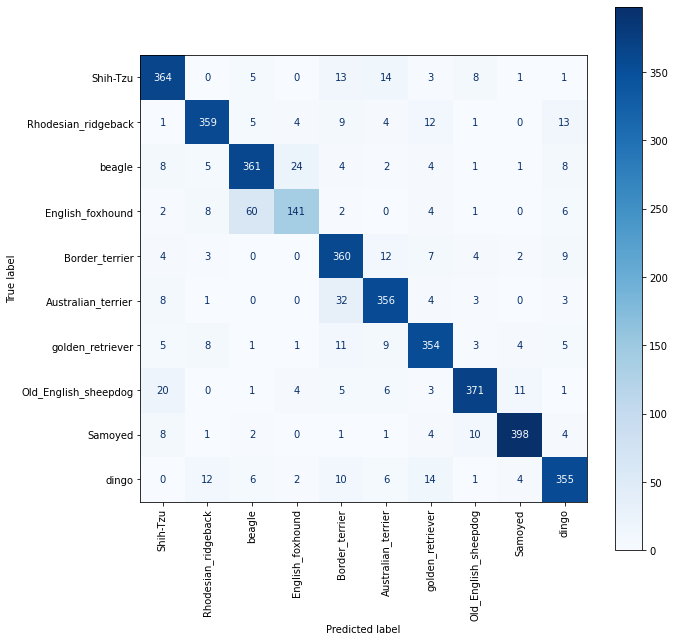

In [ ]:
import yaml
from classification_dogs.scripts.train import Trainer

config_filename = 'resnet18'
with open(f'classification_dogs/scripts/config/{config_filename}.yaml', 'r') as file:
    params = yaml.load(file, yaml.Loader)

trainer = Trainer(params)
trainer.run(config_filename)

Epoch: 2. Train loss: 0.019 | accuracy: 0.801: 100%|██████████| 226/226 [03:01<00:00,  1.25it/s]
Epoch: 2. Validation loss: 0.010 | accuracy: 0.899: 100%|██████████| 57/57 [00:18<00:00,  3.08it/s]
Epoch: 3. Train loss: 0.016 | accuracy: 0.822: 100%|██████████| 226/226 [03:02<00:00,  1.24it/s]
Epoch: 3. Validation loss: 0.010 | accuracy: 0.902: 100%|██████████| 57/57 [00:18<00:00,  3.04it/s]
Epoch: 4. Train loss: 0.014 | accuracy: 0.851: 100%|██████████| 226/226 [03:02<00:00,  1.24it/s]
Epoch: 4. Validation loss: 0.009 | accuracy: 0.903: 100%|██████████| 57/57 [00:18<00:00,  3.02it/s]
Epoch: 5. Train loss: 0.013 | accuracy: 0.858: 100%|██████████| 226/226 [03:03<00:00,  1.23it/s]
Epoch: 5. Validation loss: 0.009 | accuracy: 0.912: 100%|██████████| 57/57 [00:18<00:00,  3.06it/s]



Saved best model
Validation accuracy = 0.912



Epoch: 6. Train loss: 0.012 | accuracy: 0.873: 100%|██████████| 226/226 [03:02<00:00,  1.24it/s]
Epoch: 6. Validation loss: 0.009 | accuracy: 0.911: 100%|██████████| 57/57 [00:18<00:00,  3.10it/s]
Epoch: 7. Train loss: 0.011 | accuracy: 0.882: 100%|██████████| 226/226 [03:02<00:00,  1.24it/s]
Epoch: 7. Validation loss: 0.011 | accuracy: 0.893: 100%|██████████| 57/57 [00:18<00:00,  3.08it/s]
Epoch: 8. Train loss: 0.011 | accuracy: 0.887: 100%|██████████| 226/226 [03:01<00:00,  1.24it/s]
Epoch: 8. Validation loss: 0.009 | accuracy: 0.905: 100%|██████████| 57/57 [00:18<00:00,  3.11it/s]
Epoch: 9. Train loss: 0.009 | accuracy: 0.900: 100%|██████████| 226/226 [03:02<00:00,  1.24it/s]
Epoch: 9. Validation loss: 0.009 | accuracy: 0.906: 100%|██████████| 57/57 [00:18<00:00,  3.05it/s]
  0%|          | 0/123 [00:00<?, ?it/s]

Test accuracy: 0.905: 100%|██████████| 123/123 [00:39<00:00,  3.13it/s]


                      precision    recall  f1-score   support

            Shih-Tzu       0.87      0.95      0.91       409
 Rhodesian_ridgeback       0.94      0.92      0.93       408
              beagle       0.83      0.91      0.86       418
    English_foxhound       0.84      0.70      0.76       224
      Border_terrier       0.82      0.94      0.87       401
  Australian_terrier       0.95      0.87      0.91       407
    golden_retriever       0.93      0.90      0.92       401
Old_English_sheepdog       0.97      0.91      0.94       422
             Samoyed       0.96      0.97      0.96       429
               dingo       0.93      0.90      0.91       410

            accuracy                           0.91      3929
           macro avg       0.90      0.90      0.90      3929
        weighted avg       0.91      0.91      0.91      3929



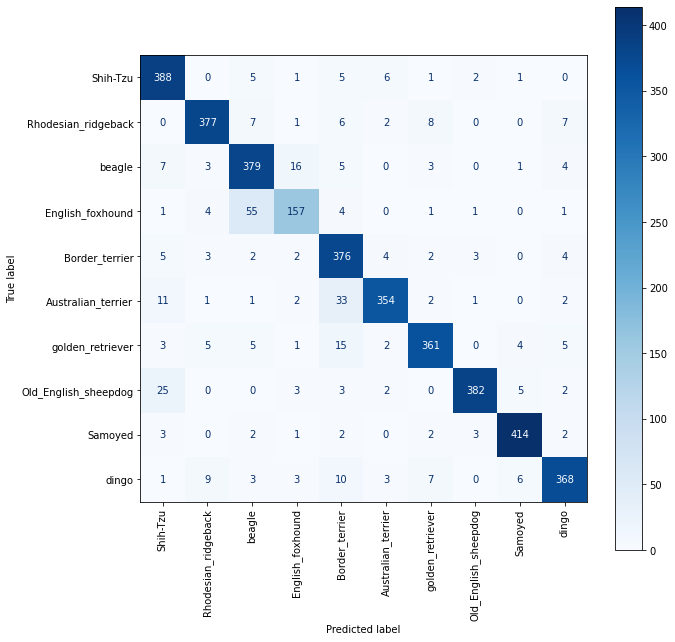

In [ ]:
config_filename = 'resnet50'
with open(f'classification_dogs/scripts/config/{config_filename}.yaml', 'r') as file:
    params = yaml.load(file, yaml.Loader)

trainer = Trainer(params)
trainer.run(config_filename)